<a href="https://colab.research.google.com/github/VladimirBoshnjakovski/explainable-ai-thesis-code/blob/main/05_xai_pdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# ──────────────── IMPORT LIBRARIES ────────────────

# Data handling
import pandas as pd  # For working with tabular data

# Machine learning tools
from sklearn.model_selection import train_test_split  # Split data into train/test sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.preprocessing import StandardScaler  # Normalize feature values
from sklearn.metrics import classification_report  # Generate classification report

# Partial Dependence Plot (Global Explainability)
from sklearn.inspection import PartialDependenceDisplay  # Tool for plotting PDPs

# Visualization
import matplotlib.pyplot as plt  # Plotting library

# Google Colab utilities
from google.colab import files  # Upload/download files in Colab


In [11]:
# ──────────────── FILE UPLOAD ────────────────
uploaded = files.upload()  # Opens a file upload dialog in Colab; allows user to select a local file

# Reads the first uploaded file into a pandas DataFrame
# 'uploaded' is a dictionary where keys are filenames; 'next(iter(uploaded))' gets the first filename
df = pd.read_csv(next(iter(uploaded)))

Saving encoded_heart_disease_data.csv to encoded_heart_disease_data (1).csv


In [15]:
# ──────────────── STEP 2: Define features (X) and target (y) ────────────────
X = df.drop(columns=["Presence of Heart Disease (1=Yes)"])  # Feature set
y = df["Presence of Heart Disease (1=Yes)"].astype(int)      # Target variable (binary)

# ──────────────── STEP 3: Train/test split ────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ──────────────── STEP 4: Scale numeric features only (optional but recommended) ────────────────
num_cols = X.select_dtypes(include='number').columns  # Select only numeric columns
scaler = StandardScaler()

# Apply scaling using .loc to avoid chained assignment warning
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

# ──────────────── STEP 5: Train black box model (Random Forest) ────────────────
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ──────────────── STEP 6: Evaluate the model ────────────────
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


/tmp/ipython-input-100322631.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.50973703 -0.26883392 -0.38005834  1.51075683 -0.93618044  1.06585914
  1.62198125  0.73218588  0.39851261 -0.7137316  -1.49230255 -2.82699561
 -0.49128276 -0.04638507  0.17606377 -2.15964908 -1.15862929  1.73320567
 -0.04638507  0.39851261  1.06585914  0.17606377  0.39851261 -1.04740487
  0.95463472  0.8434103   1.17708356 -0.49128276 -1.38107813  0.8434103
 -1.93720024 -1.26985371  0.73218588 -0.26883392  0.95463472  0.95463472
  1.51075683  1.62198125  2.4005522  -0.60250718 -2.2708735  -0.38005834
  1.28830798  0.62096146 -0.26883392  0.39851261 -1.15862929  0.39851261
  0.28728819 -1.04740487  1.17708356 -0.82495602 -0.93618044 -0.04638507
  0.50973703 -1.26985371 -0.15760949 -0.93618044 -1.38107813 -0.82495602
 -0.04638507  0.28728819 -1.49230255 -1.49230255  0.06483935 -0.49128276
  0.50973703  1.06585914  0.95463472 -0.2688

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.88      0.95      0.91        44

    accuracy                           0.89        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.90      0.89      0.89        75



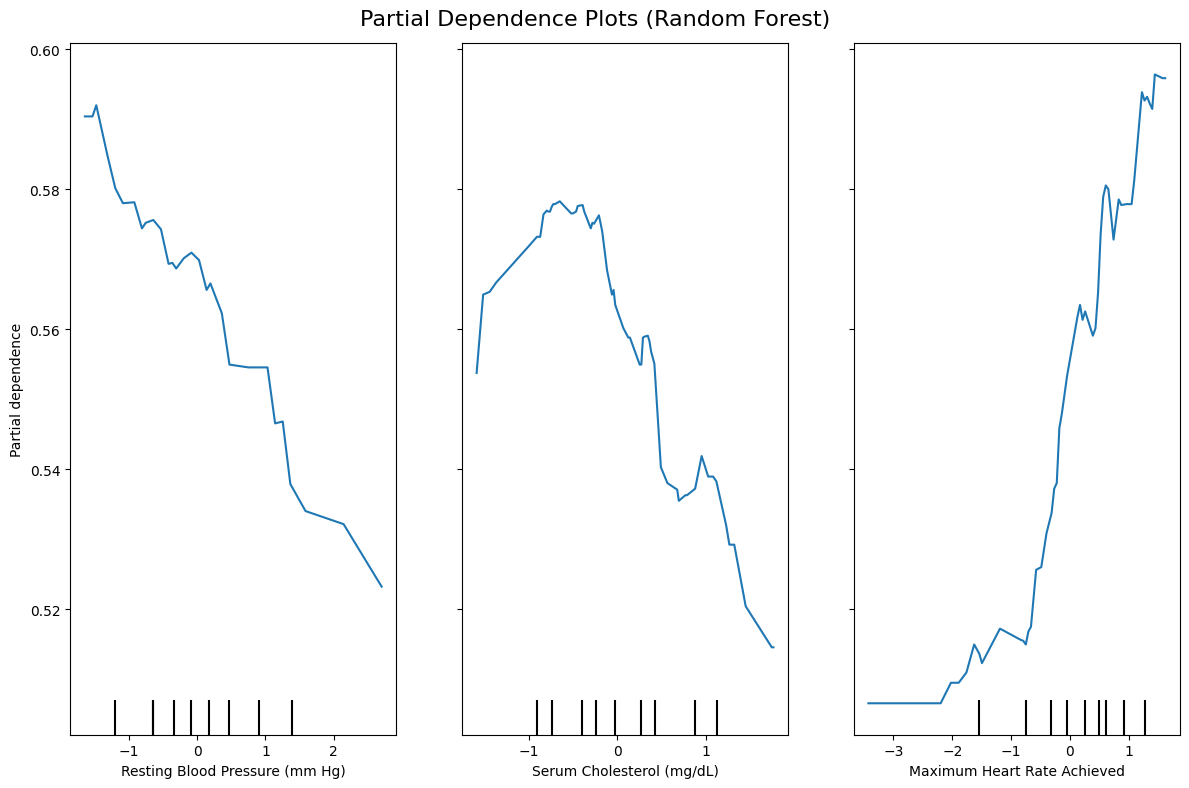

In [16]:
# ──────────────── PDP: DEFINE FEATURES TO PLOT ────────────────
pdp_features = [
    'Resting Blood Pressure (mm Hg)',
    'Serum Cholesterol (mg/dL)',
    'Maximum Heart Rate Achieved'
]

# ──────────────── PDP: PLOT PARTIAL DEPENDENCE PLOTS ────────────────
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    estimator=rf_model,       # Trained model
    X=X_test,                 # Data to evaluate
    features=pdp_features,    # List of feature names to plot
    feature_names=X.columns,  # All column names (ensures proper labeling)
    ax=ax                     # Axes to draw on
)
plt.suptitle("Partial Dependence Plots (Random Forest)", fontsize=16)
plt.tight_layout()
plt.show()



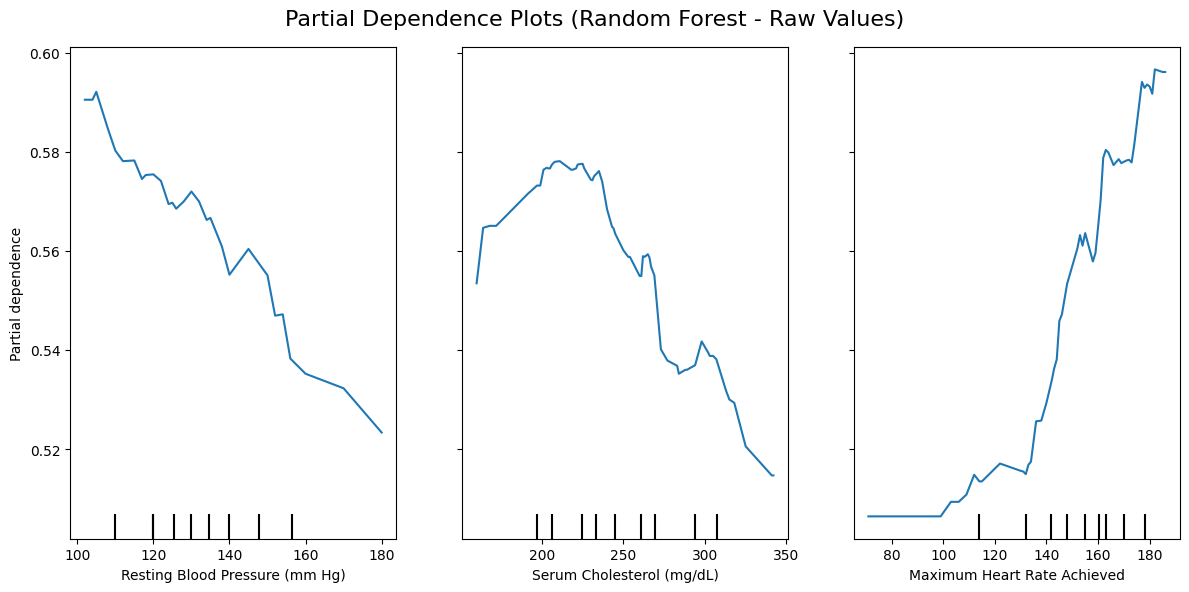

In [18]:
# ──────────────── PDP: DEFINE FEATURES TO PLOT ────────────────
# Define features and target
X = df.drop(columns=["Presence of Heart Disease (1=Yes)"])
y = df["Presence of Heart Disease (1=Yes)"].astype(int)

# Split into train/test sets (no scaling to preserve raw values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest model on raw data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ──────────────── STEP 2: PLOT PDPs ────────────────
pdp_features = [
    'Resting Blood Pressure (mm Hg)',
    'Serum Cholesterol (mg/dL)',
    'Maximum Heart Rate Achieved'
]

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    estimator=rf_model,
    X=X_test,
    features=pdp_features,
    feature_names=X.columns,
    ax=ax,
    kind='average',            # Average PDP (not ICE)
    grid_resolution=100        # Smooth line over 100 points
)
plt.suptitle("Partial Dependence Plots (Random Forest - Raw Values)", fontsize=16)
plt.tight_layout()
plt.show()
